In [29]:
import numpy as np
import pandas as pd
from time import time,sleep
from random import randint as r
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [30]:
# reward = pd.read_csv('maze.csv')
# reward_array = np.array(reward)
reward = pd.read_excel('maze_reward_table.xlsx', sheet_name="Sheet4", header=None)
# reward.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# reward.index = [1,2,3,4,5,6,7,8,9,10]
reward = np.array(reward)
# terminals = [16,28,31,43,46,58,73,75,76,77,78,79,80,81,82,88,96,103,111,129,130,131,132,133,134]
terminals = [17,28,32,43,47,58,73,75,76,77,78,79,80,81,82,88,96,103,111,129,130,131,132,133,134]
actions = {"up": 0,"down" : 1,"left" : 2,"right" : 3}

In [31]:
def select_action(current_state, current_pos, epsilon, Q):
    possible_actions = []
    
    if np.random.uniform() <= epsilon:
        if current_pos[0] != 0:
            possible_actions.append("up")
        if current_pos[0] != ny-1:
            possible_actions.append("down")
        if current_pos[1] != 0:
            possible_actions.append("left")
        if current_pos[1] != nx-1:
            possible_actions.append("right")
        action = actions[possible_actions[r(0,len(possible_actions)-1)]]
    else:
        m = np.min(Q[:,current_state])
        if current_pos[0] != 0: #up
            possible_actions.append(Q[0,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[0] != ny-1: #down
            possible_actions.append(Q[1,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[1] != 0: #left
            possible_actions.append(Q[2,current_state])
        else:
            possible_actions.append(m - 100)
        if current_pos[1] != nx-1: #right
            possible_actions.append(Q[3,current_state])
        else:
            possible_actions.append(m - 100)
        action = random.choice([i for i,a in enumerate(possible_actions) if a == max(possible_actions)]) #randomly selecting one of all possible actions with maximin value
    return action

In [32]:
def episode(epsilon, gamma, eta, current_pos, Q):
    win_state = 147
    test = []
    exit_flag = 0
    current_pos_temp = current_pos.copy()
    current_state = states[(current_pos[0],current_pos[1])]
    action = select_action(current_state, current_pos, epsilon, Q)
    if action == 0: #move up
        current_pos[0] -= 1
    elif action == 1: #move down
        current_pos[0] += 1
    elif action == 2: #move left
        current_pos[1] -= 1
    elif action == 3: #move right
        current_pos[1] += 1
    new_state = states[(current_pos[0],current_pos[1])]
    
    if new_state not in terminals:
        Q[action, current_state] += eta*(reward[current_pos[0],current_pos[1]] + gamma*(np.max(Q[:,new_state])) - Q[action,current_state])
        if new_state == win_state: exit_flag = 1
    else:
        Q[action, current_state] += eta*(reward[current_pos[0],current_pos[1]] - Q[action,current_state])
        exit_flag = 1
        current_pos = [0,0]
        new_state = 0
#
    return exit_flag, new_state, current_pos, Q

In [33]:
nx = 15
ny = 10
epsilon = 0.1 # Epsilon
eta = 0.1 # Learning Rate
gamma = 0.95 
Q = np.zeros((4,150)) # inititalise q table
current_pos = [0,0]
actions = {"up": 0,"down" : 1,"left" : 2,"right" : 3}
states = {}
k=0
for i in range(ny):
    for j in range(nx):
        states[(i,j)] = k
        k+=1

run = True
counter = 0
iteration = 0
state_history = []
train_history = []
start = time.time()
while run:
    train_counter = 0
    episode_flag = True
    
    while episode_flag:
        
        exit_flag, current_state, current_pos, Q = episode(epsilon, gamma, eta, current_pos, Q)
        if (exit_flag == 1): episode_flag = False
        train_counter += 1
    train_history.append(train_counter)
    counter += 1
    if (counter/1000) in ([1,2,3,4,5,6,7,8,9]):
        end=time.time()
        print('Episode ',counter,' time = ', round(end-start,2), 'sec')
        start = end
    if (counter == 10000): run = False
#     print('*****************')

Episode  1000  time =  0.59 sec
Episode  2000  time =  0.56 sec
Episode  3000  time =  0.53 sec
Episode  4000  time =  0.62 sec
Episode  5000  time =  0.5 sec
Episode  6000  time =  0.58 sec
Episode  7000  time =  0.54 sec
Episode  8000  time =  0.49 sec
Episode  9000  time =  0.6 sec


In [34]:
episodes = list(range(len(train_history)))
data = pd.DataFrame(episodes)
data['train'] = train_history

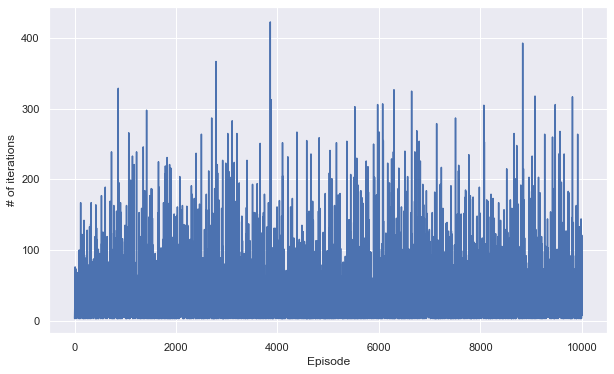

In [35]:
sns.set()
plt.figure(figsize=(10, 6))

ax = sns.lineplot(x=0, y='train', data=data)
ax.set(xlabel='Episode', ylabel='# of iterations')
# ax.set(yscale="log")
# ax.grid(False)

plt.savefig('Q-learning 1d chris.png',bbox_inches = 'tight');

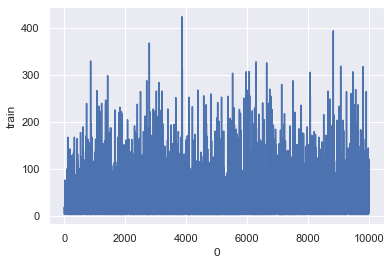

In [36]:
ax = sns.lineplot(x=0, y='train', data=data)

In [37]:
data[9000:10000].mean()

0        9499.500
train      31.818
dtype: float64

In [38]:
pd.DataFrame(Q)[[0,1,2,3,4,5,6,7, 16,30,45,60,61,62,63,64,65,66,67,68,69, 146, 147, 148]]

,0,1,2,3,4,5,6,7,16,30,...,63,64,65,66,67,68,69,146,147,148
0,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,-0.010000,-0.0100,...,-0.008262,-0.009358,-0.011323,-0.011574,-0.011788,-0.009943,-0.009588,0.0,0.0,0.0
1,-0.01,-1.0095,-0.01,-0.0195,-0.0195,-0.0195,-0.0195,-0.0195,-1.007864,-0.0100,...,-0.271000,-0.190000,-0.100000,-0.100000,-0.190000,-0.010523,-0.009424,0.0,0.0,0.0
2,0.00,-0.0100,-0.01,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,-0.010000,0.0000,...,-0.008494,-0.010098,-0.011774,-0.012332,-0.011940,-0.010408,-0.010203,0.0,0.0,0.0
3,-0.01,-0.0100,-0.01,-0.0100,-0.0100,-0.0100,-0.0100,-0.0100,-0.010000,-1.0095,...,-0.008244,-0.010269,-0.011863,-0.012188,-0.010950,-0.010397,-0.009595,0.0,0.0,0.0


In [43]:
current_pos = [0,0]
current_state = 0
state_history=[current_state]

def test_greedy(epsilon, gamma, eta, current_pos, Q):  
    win_state = 147
    exit_flag = 0
    current_pos_temp = current_pos.copy()
    current_state = states[(current_pos[0],current_pos[1])]
#     print(current_state)
    action = select_action(current_state, current_pos, epsilon, Q)
    if action == 0: #move up
        current_pos[0] -= 1
    elif action == 1: #move down
        current_pos[0] += 1
    elif action == 2: #move left
        current_pos[1] -= 1
    elif action == 3: #move right
        current_pos[1] += 1
    new_state = states[(current_pos[0],current_pos[1])]
#     print(new_state)
    if new_state == win_state:
        exit_flag = 1
            
    elif new_state in terminals:
#         print(new_state)
        current_pos = current_pos_temp.copy()
        new_state = states[(current_pos[0],current_pos[1])]

    return exit_flag, new_state, current_pos
    
    
train_counter = 0
episode_flag = True
epsilon = 0

while episode_flag:
    exit_flag, new_state, pos = test_greedy(epsilon, gamma, eta, current_pos, Q)
    current_pos = pos
    state_history.append(new_state)
    if (exit_flag == 1): episode_flag = False
    train_counter += 1
    if (train_counter == 100000): episode_flag = False


In [44]:
len(state_history)

100001